In [1]:
#loan prediction


In [2]:
#intial imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
import xgboost as xgb

/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
#Imports for better visualization
from collections import defaultdict
import json
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
#colorbrewer2 Dark2 qualitative color table

In [5]:
#loading dataset
train=pd.read_csv("train.csv")

In [6]:
test=pd.read_csv("test.csv")

In [7]:
train.shape

(87020, 26)

In [8]:
train.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [8]:
train.isnull().any()

ID                       False
Gender                   False
City                      True
Monthly_Income           False
DOB                      False
Lead_Creation_Date       False
Loan_Amount_Applied       True
Loan_Tenure_Applied       True
Existing_EMI              True
Employer_Name             True
Salary_Account            True
Mobile_Verified          False
Var5                     False
Var1                     False
Loan_Amount_Submitted     True
Loan_Tenure_Submitted     True
Interest_Rate             True
Processing_Fee            True
EMI_Loan_Submitted        True
Filled_Form              False
Device_Type              False
Var2                     False
Source                   False
Var4                     False
LoggedIn                 False
Disbursed                False
dtype: bool

In [9]:
test.shape

(37717, 24)

In [13]:
test.dtypes

ID                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
dtype: object

In [10]:
test.isnull().any()

ID                       False
Gender                   False
City                      True
Monthly_Income           False
DOB                      False
Lead_Creation_Date       False
Loan_Amount_Applied       True
Loan_Tenure_Applied       True
Existing_EMI              True
Employer_Name             True
Salary_Account            True
Mobile_Verified          False
Var5                     False
Var1                     False
Loan_Amount_Submitted     True
Loan_Tenure_Submitted     True
Interest_Rate             True
Processing_Fee            True
EMI_Loan_Submitted        True
Filled_Form              False
Device_Type              False
Var2                     False
Source                   False
Var4                     False
dtype: bool

In [12]:
def num_missing(x):
  return sum(x.isnull())

In [13]:
print "Missing values per column:"
print train.apply(num_missing, axis=0)

Missing values per column:
ID                           0
Gender                       0
City                      1003
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         71
Loan_Tenure_Applied         71
Existing_EMI                71
Employer_Name               71
Salary_Account           11764
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    34613
Loan_Tenure_Submitted    34613
Interest_Rate            59294
Processing_Fee           59600
EMI_Loan_Submitted       59294
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
LoggedIn                     0
Disbursed                    0
dtype: int64


In [20]:
print "Missing values per column:"
print test.apply(num_missing, axis=0)

Missing values per column:
ID                           0
Gender                       0
City                       398
Monthly_Income               0
DOB                          0
Lead_Creation_Date           0
Loan_Amount_Applied         40
Loan_Tenure_Applied         40
Existing_EMI                40
Employer_Name               42
Salary_Account            5037
Mobile_Verified              0
Var5                         0
Var1                         0
Loan_Amount_Submitted    14922
Loan_Tenure_Submitted    14922
Interest_Rate            25607
Processing_Fee           25746
EMI_Loan_Submitted       25607
Filled_Form                  0
Device_Type                  0
Var2                         0
Source                       0
Var4                         0
dtype: int64


In [14]:
#imbalanced data problem so should be handled that way

In [15]:
#dropping Id
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [16]:
#univariate analysis
train.columns

Index([u'Gender', u'City', u'Monthly_Income', u'DOB', u'Lead_Creation_Date',
       u'Loan_Amount_Applied', u'Loan_Tenure_Applied', u'Existing_EMI',
       u'Employer_Name', u'Salary_Account', u'Mobile_Verified', u'Var5',
       u'Var1', u'Loan_Amount_Submitted', u'Loan_Tenure_Submitted',
       u'Interest_Rate', u'Processing_Fee', u'EMI_Loan_Submitted',
       u'Filled_Form', u'Device_Type', u'Var2', u'Source', u'Var4',
       u'LoggedIn', u'Disbursed'],
      dtype='object')

In [17]:
#categorical variables
train['Gender'].value_counts()
#not imbalanced

Male      49848
Female    37172
Name: Gender, dtype: int64

In [18]:
#categorical variables
len(train['City'].value_counts())
#lot of categories
#drop it or use few top occurence as different variable

697

In [30]:
train['City'].value_counts()

Delhi                  12527
Bengaluru              10824
Mumbai                 10795
Hyderabad               7272
Chennai                 6916
Pune                    5207
Kolkata                 2888
Ahmedabad               1788
Jaipur                  1331
Gurgaon                 1212
Coimbatore              1147
Thane                    905
Chandigarh               870
Surat                    802
Visakhapatnam            764
Indore                   734
Vadodara                 624
Nagpur                   594
Lucknow                  580
Ghaziabad                560
Bhopal                   513
Kochi                    492
Patna                    461
Faridabad                447
Madurai                  375
Noida                    373
Gautam Buddha Nagar      338
Dehradun                 314
Raipur                   289
Bhubaneswar              277
                       ...  
Fazilka                    1
Mainpuri                   1
Kargil                     1
DHORAJI       

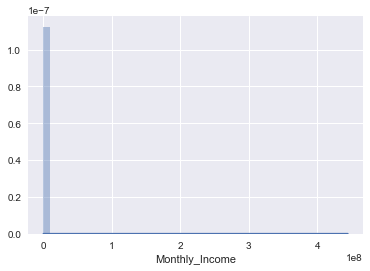

In [19]:
#consider it as continous variable
sns.distplot(train['Monthly_Income'])


In [20]:
# date of birth variable can be used for age variable
type(train['DOB'])

pandas.core.series.Series

In [21]:
#number of months can be extracted from it
train['Lead_Creation_Date'].value_counts()

03-Jul-15    2315
23-Jul-15    1994
30-Jul-15    1297
27-Jul-15    1292
31-Jul-15    1268
29-Jul-15    1236
20-Jul-15    1231
22-Jun-15    1201
21-Jul-15    1201
15-Jul-15    1193
28-Jul-15    1191
26-May-15    1190
18-Jul-15    1188
22-Jul-15    1188
23-Jun-15    1187
17-Jun-15    1154
04-Jun-15    1132
05-May-15    1128
06-Jul-15    1126
29-Jun-15    1088
04-May-15    1088
13-May-15    1081
18-May-15    1078
03-Jun-15    1066
27-May-15    1064
07-Jul-15    1055
18-Jun-15    1049
26-Jun-15    1047
25-May-15    1045
09-Jun-15    1044
             ... 
08-May-15     860
13-Jul-15     854
20-Jun-15     820
24-Jun-15     815
30-May-15     808
05-Jun-15     804
10-Jul-15     779
09-May-15     760
13-Jun-15     750
11-Jun-15     748
19-May-15     725
02-May-15     725
06-Jun-15     717
25-Jun-15     709
21-Jun-15     691
23-May-15     686
26-Jul-15     673
05-Jul-15     630
28-Jun-15     629
01-May-15     608
11-Jul-15     598
19-Jul-15     597
17-May-15     571
07-Jun-15     559
03-May-15 

In [23]:
#lot of zeros present and missing value are also there which are less and hence can be imputed by median
#new variable can be created yes or no kind of that
train['Loan_Amount_Applied'].value_counts()

0.0          28853
100000.0     14311
200000.0     13058
300000.0      9995
500000.0      9762
1000000.0     4195
50000.0       1245
400000.0       546
150000.0       540
600000.0       391
1500000.0      374
700000.0       343
800000.0       227
2000000.0      215
60000.0        207
250000.0       192
30000.0        158
350000.0       144
2500000.0      134
70000.0        130
20000.0        109
1200000.0      105
80000.0         89
75000.0         89
40000.0         88
25000.0         82
3000000.0       80
10000.0         58
450000.0        47
900000.0        41
             ...  
22500.0          1
157000.0         1
1780000.0        1
370000.0         1
132000.0         1
5500.0           1
605000.0         1
139450.0         1
4800000.0        1
5.0              1
9499.0           1
740000.0         1
216000.0         1
1650000.0        1
920000.0         1
312000.0         1
497000.0         1
349000.0         1
109000.0         1
425000.0         1
8500.0           1
290000.0    

In [24]:
#categorical variable
#6,7,8,10 can be merged to get a new variable
#most frequent imputation
train['Loan_Tenure_Applied'].value_counts()

0.0     33844
5.0     19083
3.0     13080
2.0      9463
4.0      6620
1.0      4812
10.0       40
7.0         3
6.0         2
9.0         1
8.0         1
Name: Loan_Tenure_Applied, dtype: int64

In [25]:
# yes or no variable and 0 imputation
train['Existing_EMI'].value_counts()

0.0        58238
5000.0      2695
10000.0     1737
3000.0      1581
4000.0      1226
2000.0      1097
6000.0       837
15000.0      800
8000.0       786
2500.0       727
7000.0       718
3500.0       601
20000.0      521
12000.0      480
9000.0       361
4500.0       340
1500.0       323
1000.0       323
25000.0      282
11000.0      277
7500.0       255
30000.0      241
14000.0      217
13000.0      209
5500.0       203
8500.0       187
18000.0      185
6500.0       166
16000.0      158
17000.0      158
           ...  
8320.0         1
22300.0        1
9359.0         1
13161.0        1
5801.0         1
6348.0         1
9370.0         1
14062.0        1
6918.0         1
2855.0         1
1989.0         1
9387.0         1
11434.0        1
13481.0        1
6802.0         1
27250.0        1
2858.0         1
8326.0         1
9676.0         1
4105.0         1
7762.0         1
11427.0        1
6737.0         1
122.0          1
2344.0         1
11036.0        1
1703.0         1
2335.0        

In [26]:
#drop employer name as many categorical variables
train.drop('Employer_Name',axis=1,inplace=True)
test.drop('Employer_Name',axis=1,inplace=True)

In [27]:
#drop it lot of categories
train.drop('Salary_Account',axis=1,inplace=True)
test.drop('Salary_Account',axis=1,inplace=True)

In [28]:
# not imbalanced can be used directly
train['Mobile_Verified'].value_counts()

Y    56481
N    30539
Name: Mobile_Verified, dtype: int64

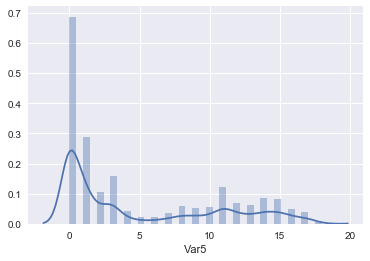

In [29]:
#continous variable
#bimodal plot
sns.distplot(train['Var5'])

In [30]:
#continous variable
#categorical variables
train['Var1'].value_counts()

HBXX    59294
HBXC     9010
HBXB     4479
HAXA     2909
HBXA     2123
HAXB     2011
HBXD     1964
HAXC     1536
HBXH      970
HCXF      722
HAYT      508
HAVC      384
HAXM      268
HCXD      237
HCYS      217
HVYS      186
HAZD      109
HCXG       78
HAXF       15
Name: Var1, dtype: int64

In [31]:
#use as continous variables
#median imputation will work
train['Loan_Amount_Submitted']

0              NaN
1         200000.0
2         450000.0
3         920000.0
4         500000.0
5         300000.0
6              NaN
7         200000.0
8        1300000.0
9         300000.0
10        660000.0
11             NaN
12             NaN
13        200000.0
14             NaN
15        500000.0
16        300000.0
17             NaN
18             NaN
19        450000.0
20       1040000.0
21             NaN
22             NaN
23        600000.0
24        740000.0
25             NaN
26        260000.0
27             NaN
28             NaN
29       1000000.0
           ...    
86990    1440000.0
86991    1440000.0
86992          NaN
86993     600000.0
86994     190000.0
86995     180000.0
86996     500000.0
86997     500000.0
86998     810000.0
86999          NaN
87000          NaN
87001     950000.0
87002          NaN
87003     570000.0
87004          NaN
87005    1000000.0
87006          NaN
87007     190000.0
87008     870000.0
87009     200000.0
87010     500000.0
87011     24

In [32]:
#max freq imputation
#categorical variable
train['Loan_Tenure_Submitted'].value_counts()

5.0    20765
4.0    15135
3.0     8858
2.0     5332
1.0     2314
6.0        3
Name: Loan_Tenure_Submitted, dtype: int64

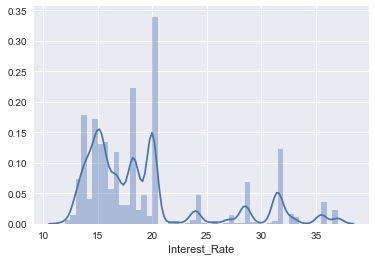

In [33]:
#continous variable
#median imputation
sns.distplot(train['Interest_Rate'].dropna())

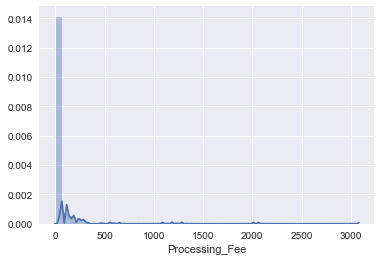

In [34]:
#continous variables
#median imputation
sns.distplot(train['Processing_Fee'].value_counts())

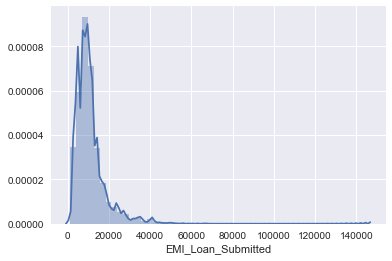

In [35]:
#median imputation and continous variables
sns.distplot(train['EMI_Loan_Submitted'].dropna())

In [36]:
train.columns

Index([u'Gender', u'City', u'Monthly_Income', u'DOB', u'Lead_Creation_Date',
       u'Loan_Amount_Applied', u'Loan_Tenure_Applied', u'Existing_EMI',
       u'Mobile_Verified', u'Var5', u'Var1', u'Loan_Amount_Submitted',
       u'Loan_Tenure_Submitted', u'Interest_Rate', u'Processing_Fee',
       u'EMI_Loan_Submitted', u'Filled_Form', u'Device_Type', u'Var2',
       u'Source', u'Var4', u'LoggedIn', u'Disbursed'],
      dtype='object')

In [37]:
#that is imbalanced but good to go
train['Filled_Form'].value_counts()

N    67530
Y    19490
Name: Filled_Form, dtype: int64

In [38]:
#categorical variable
train['Device_Type'].value_counts()

Web-browser    64316
Mobile         22704
Name: Device_Type, dtype: int64

In [39]:
#categorical variables
#merging can be done
train['Var2'].value_counts()

B    37280
G    33032
C    14210
E     1315
D      634
F      544
A        5
Name: Var2, dtype: int64

In [40]:
#lot of categories should be dropped
len(train['Source'].value_counts())

30

In [41]:
#merging should be there
train['Var4'].value_counts()

3    25260
1    23906
5    20266
4     6577
2     5931
0     2546
7     2302
6      232
Name: Var4, dtype: int64

In [42]:
#highly imbalanced categorical variable
train['LoggedIn'].value_counts()

0    84466
1     2554
Name: LoggedIn, dtype: int64

In [43]:
#highly imbalanced categorical variable
train['Disbursed'].value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

In [102]:
#merging train and test data
total_data=pd.concat([train,test],axis=0)

In [103]:
total_data.columns

Index([u'City', u'DOB', u'Device_Type', u'Disbursed', u'EMI_Loan_Submitted',
       u'Existing_EMI', u'Filled_Form', u'Gender', u'Interest_Rate',
       u'Lead_Creation_Date', u'Loan_Amount_Applied', u'Loan_Amount_Submitted',
       u'Loan_Tenure_Applied', u'Loan_Tenure_Submitted', u'LoggedIn',
       u'Mobile_Verified', u'Monthly_Income', u'Processing_Fee', u'Source',
       u'Var1', u'Var2', u'Var4', u'Var5'],
      dtype='object')

In [104]:
total_data.drop('City',axis=1,inplace=True)

In [105]:
total_data=total_data.reset_index(drop=True)

In [106]:
total_data['Age']=0
n=total_data.shape[0]
for i in range(n):
    k=total_data.ix[i,'DOB']
    total_data.ix[i,'Age']=17+int(100-int(k[7:]))
    if i%10000==0:
        print(i)

/home/roop/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000


In [107]:
#creating EMI_Loan_Submitted_Missing
total_data['EMI_Loan_Submitted_Missing']=total_data['EMI_Loan_Submitted'].isnull()

In [108]:
#imputin median as very less missing values
total_data['Existing_EMI'].fillna(np.median(total_data['Existing_EMI'].dropna()), inplace=True)

In [109]:
#creating Interest_Rate_Missing
total_data['Interest_Rate_Missing']=total_data['Interest_Rate'].isnull()

In [110]:
# droping lead creation date
total_data.drop('Lead_Creation_Date',axis=1,inplace=True)

In [111]:
# median imputation
total_data['Loan_Amount_Applied'].fillna(np.median(total_data['Loan_Amount_Applied'].dropna()), inplace=True)

In [112]:
#median imputation
total_data['Loan_Tenure_Applied'].fillna(np.median(total_data['Loan_Tenure_Applied'].dropna()), inplace=True)

In [113]:
# creating Loan_Amount_Submitted_Missing
total_data['Loan_Amount_Submitted_Missing']=total_data['Loan_Amount_Submitted'].isnull()

In [114]:
# creating Loan_Tenure_Submitted_Missing
total_data['Loan_Tenure_Submitted_Missing']=total_data['Loan_Tenure_Submitted'].isnull()

In [115]:
# creating Processing_Fee_Missing
total_data['Processing_Fee_Missing']=total_data['Processing_Fee'].isnull()

In [116]:
total_data['Source'].value_counts()

S122    55249
S133    42900
S159     7999
S143     6140
S127     2804
S137     2450
S134     1900
S161     1109
S151     1018
S157      929
S153      705
S144      447
S156      432
S158      294
S123      112
S141       83
S162       60
S124       43
S150       19
S160       11
S136        5
S138        5
S155        5
S139        4
S129        4
S135        2
S131        1
S130        1
S132        1
S125        1
S140        1
S142        1
S126        1
S154        1
Name: Source, dtype: int64

In [117]:
# merging other variables
n=total_data.shape[0]
for i in range(n):
    if total_data.ix[i,'Source']!='S122' and total_data.ix[i,'Source']!='S133':
        total_data.ix[i,'Source']='other'

In [118]:
total_data['Source'].value_counts()

S122     55249
S133     42900
other    26588
Name: Source, dtype: int64

In [119]:
#drop DON+B
total_data.drop('DOB',axis=1,inplace=True)

In [121]:
total_data.columns

Index([u'Device_Type', u'Disbursed', u'EMI_Loan_Submitted', u'Existing_EMI',
       u'Filled_Form', u'Gender', u'Interest_Rate', u'Loan_Amount_Applied',
       u'Loan_Amount_Submitted', u'Loan_Tenure_Applied',
       u'Loan_Tenure_Submitted', u'LoggedIn', u'Mobile_Verified',
       u'Monthly_Income', u'Processing_Fee', u'Var1', u'Var2', u'Var4',
       u'Var5', u'Age', u'EMI_Loan_Submitted_Missing',
       u'Interest_Rate_Missing', u'Loan_Amount_Submitted_Missing',
       u'Loan_Tenure_Submitted_Missing', u'Processing_Fee_Missing'],
      dtype='object')

In [124]:
#categorical variables - Device_Type, Filled_Form, Gender, Loan_Tenure_Applied, Loan_Tenure_Submitted,LoggedIn
# Mobile_Verified, Var1,Var2,Var5,var4,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Loan_Amount_Submitted_Missing
#Loan_Tenure_Submitted_Missing, Processing_Fee_Missing

In [125]:
total_data['Age'].value_counts()

29     10223
30      9687
28      9478
31      9261
27      8954
32      8521
33      7346
34      6529
26      6499
35      5668
25      4814
37      4712
36      4477
38      3084
24      2805
39      2628
40      2083
41      1799
42      1699
47      1381
23      1367
43      1309
44      1084
45      1028
46       827
48       779
22       700
49       700
50       613
52       549
       ...  
53       450
55       430
54       426
56       362
57       343
21       285
58       277
59       198
20       182
60       165
61       132
62        88
63        65
66        52
67        40
65        34
64        33
102       22
70         9
74         8
75         4
68         4
71         3
69         2
85         2
76         2
72         2
88         1
79         1
81         1
Name: Age, Length: 61, dtype: int64

In [177]:
total_data.columns

Index([u'Device_Type', u'Disbursed', u'EMI_Loan_Submitted', u'Existing_EMI',
       u'Filled_Form', u'Gender', u'Interest_Rate', u'Loan_Amount_Applied',
       u'Loan_Amount_Submitted', u'Loan_Tenure_Applied',
       u'Loan_Tenure_Submitted', u'LoggedIn', u'Mobile_Verified',
       u'Monthly_Income', u'Processing_Fee', u'Var1', u'Var2', u'Var4',
       u'Var5', u'Age', u'EMI_Loan_Submitted_Missing',
       u'Interest_Rate_Missing', u'Loan_Amount_Submitted_Missing',
       u'Loan_Tenure_Submitted_Missing', u'Processing_Fee_Missing'],
      dtype='object')

In [180]:
#dropping variables less important
total_data.drop(['EMI_Loan_Submitted','Interest_Rate','Loan_Amount_Submitted','Loan_Tenure_Submitted','LoggedIn','Processing_Fee'],axis=1,inplace=True)

In [181]:
categorical_variable=['Device_Type','Filled_Form','Gender','Loan_Tenure_Applied',
                      'Mobile_Verified','Var1','Var2','Var5','Var4','EMI_Loan_Submitted_Missing',
                      'Interest_Rate_Missing','Loan_Amount_Submitted_Missing','Loan_Tenure_Submitted_Missing', 
                       'Processing_Fee_Missing']

In [182]:
for col in categorical_variable:
    total_data[col]=total_data[col].astype('category')

In [183]:
total_data.dtypes

Device_Type                      category
Disbursed                         float64
Existing_EMI                      float64
Filled_Form                      category
Gender                           category
Loan_Amount_Applied               float64
Loan_Tenure_Applied              category
Mobile_Verified                  category
Monthly_Income                      int64
Var1                             category
Var2                             category
Var4                             category
Var5                             category
Age                                 int64
EMI_Loan_Submitted_Missing       category
Interest_Rate_Missing            category
Loan_Amount_Submitted_Missing    category
Loan_Tenure_Submitted_Missing    category
Processing_Fee_Missing           category
dtype: object

In [184]:
df=pd.DataFrame()

In [187]:
for col in categorical_variable:
    one_hot=pd.get_dummies(total_data[col],prefix=col)
    df=pd.concat([df,one_hot],axis=1)
    print(col)

Device_Type
Filled_Form
Gender
Loan_Tenure_Applied
Mobile_Verified
Var1
Var2
Var5
Var4
EMI_Loan_Submitted_Missing
Interest_Rate_Missing
Loan_Amount_Submitted_Missing
Loan_Tenure_Submitted_Missing
Processing_Fee_Missing


In [188]:
len(df.columns)

82

In [189]:
df.isnull().any()

Device_Type_Mobile                     False
Device_Type_Web-browser                False
Filled_Form_N                          False
Filled_Form_Y                          False
Gender_Female                          False
Gender_Male                            False
Loan_Tenure_Applied_0.0                False
Loan_Tenure_Applied_1.0                False
Loan_Tenure_Applied_2.0                False
Loan_Tenure_Applied_3.0                False
Loan_Tenure_Applied_4.0                False
Loan_Tenure_Applied_5.0                False
Loan_Tenure_Applied_6.0                False
Loan_Tenure_Applied_7.0                False
Loan_Tenure_Applied_8.0                False
Loan_Tenure_Applied_9.0                False
Loan_Tenure_Applied_10.0               False
Mobile_Verified_N                      False
Mobile_Verified_Y                      False
Var1_HAVC                              False
Var1_HAXA                              False
Var1_HAXB                              False
Var1_HAXC 

In [193]:
non_categorical=['Existing_EMI','Monthly_Income','Age']

In [194]:
total_data.columns

Index([u'Device_Type', u'Disbursed', u'Existing_EMI', u'Filled_Form',
       u'Gender', u'Loan_Amount_Applied', u'Loan_Tenure_Applied',
       u'Mobile_Verified', u'Monthly_Income', u'Var1', u'Var2', u'Var4',
       u'Var5', u'Age', u'EMI_Loan_Submitted_Missing',
       u'Interest_Rate_Missing', u'Loan_Amount_Submitted_Missing',
       u'Loan_Tenure_Submitted_Missing', u'Processing_Fee_Missing'],
      dtype='object')

In [195]:
df=pd.concat([df,total_data[non_categorical]],axis=1)

In [196]:
len(df.columns)

85

In [198]:
df.columns

Index([u'Device_Type_Mobile', u'Device_Type_Web-browser', u'Filled_Form_N',
       u'Filled_Form_Y', u'Gender_Female', u'Gender_Male',
       u'Loan_Tenure_Applied_0.0', u'Loan_Tenure_Applied_1.0',
       u'Loan_Tenure_Applied_2.0', u'Loan_Tenure_Applied_3.0',
       u'Loan_Tenure_Applied_4.0', u'Loan_Tenure_Applied_5.0',
       u'Loan_Tenure_Applied_6.0', u'Loan_Tenure_Applied_7.0',
       u'Loan_Tenure_Applied_8.0', u'Loan_Tenure_Applied_9.0',
       u'Loan_Tenure_Applied_10.0', u'Mobile_Verified_N', u'Mobile_Verified_Y',
       u'Var1_HAVC', u'Var1_HAXA', u'Var1_HAXB', u'Var1_HAXC', u'Var1_HAXF',
       u'Var1_HAXM', u'Var1_HAYT', u'Var1_HAZD', u'Var1_HBXA', u'Var1_HBXB',
       u'Var1_HBXC', u'Var1_HBXD', u'Var1_HBXH', u'Var1_HBXX', u'Var1_HCXD',
       u'Var1_HCXF', u'Var1_HCXG', u'Var1_HCYS', u'Var1_HVYS', u'Var2_A',
       u'Var2_B', u'Var2_C', u'Var2_D', u'Var2_E', u'Var2_F', u'Var2_G',
       u'Var5_0', u'Var5_1', u'Var5_2', u'Var5_3', u'Var5_4', u'Var5_5',
       u'Var5_6', u

In [197]:
df.head()

,Device_Type_Mobile,Device_Type_Web-browser,Filled_Form_N,Filled_Form_Y,Gender_Female,Gender_Male,Loan_Tenure_Applied_0.0,Loan_Tenure_Applied_1.0,Loan_Tenure_Applied_2.0,Loan_Tenure_Applied_3.0,...,Interest_Rate_Missing_True,Loan_Amount_Submitted_Missing_False,Loan_Amount_Submitted_Missing_True,Loan_Tenure_Submitted_Missing_False,Loan_Tenure_Submitted_Missing_True,Processing_Fee_Missing_False,Processing_Fee_Missing_True,Existing_EMI,Monthly_Income,Age
0,0,1,1,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0.0,20000,39
1,0,1,1,0,0,1,0,0,1,0,...,0,1,0,1,0,0,1,0.0,35000,32
2,0,1,1,0,0,1,0,0,0,0,...,1,1,0,1,0,0,1,0.0,22500,36
3,0,1,1,0,0,1,0,0,0,0,...,1,1,0,1,0,0,1,0.0,35000,30
4,0,1,1,0,0,1,0,0,1,0,...,1,1,0,1,0,0,1,25000.0,100000,33


In [199]:
# applying xgboost and tuning
ntrain=df.iloc[:87020,:]
ntest=df.iloc[87020:,:]

In [200]:
ntrain=pd.concat([ntrain,train['Disbursed']],axis=1)

In [201]:
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

target = 'Disbursed'


/home/roop/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [205]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.891835


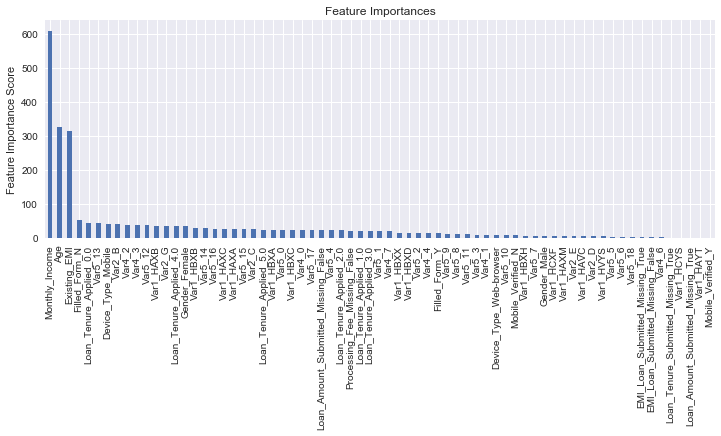

In [206]:
predictors = [x for x in ntrain.columns if x not in [target]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, ntrain, predictors)

In [208]:
# for 140 n-estimators
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(ntrain[predictors],ntrain[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.82793, std: 0.01397, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.82842, std: 0.01433, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.82726, std: 0.01387, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.83111, std: 0.01209, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.83041, std: 0.01216, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.83049, std: 0.01224, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.82750, std: 0.01016, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.82968, std: 0.01022, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.82856, std: 0.01187, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.82267, std: 0.01183, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.82351, std: 0.01150, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.82373, std: 0.01370, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 5, 'min_child_weight': 1

In [209]:
# tune gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(ntrain[predictors],ntrain[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.83053, std: 0.01330, params: {'gamma': 0.0},
  mean: 0.82973, std: 0.01328, params: {'gamma': 0.1},
  mean: 0.83094, std: 0.01286, params: {'gamma': 0.2},
  mean: 0.83015, std: 0.01379, params: {'gamma': 0.3},
  mean: 0.83019, std: 0.01325, params: {'gamma': 0.4}],
 {'gamma': 0.2},
 0.8309412401263101)

In [211]:
#tune subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(ntrain[predictors],ntrain[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.83033, std: 0.01262, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.83295, std: 0.01227, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.83291, std: 0.01167, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.83236, std: 0.01356, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.83034, std: 0.01146, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.83128, std: 0.01204, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.83206, std: 0.01241, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.83030, std: 0.01251, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.82995, std: 0.01217, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.82925, std: 0.01236, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.83091, std: 0.01177, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.83070, std: 0.01157, params: {'subsample': 0.9, 'colsample_bytree'

In [212]:
param_test6 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0.2, subsample=0.7, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(ntrain[predictors],ntrain[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.83298, std: 0.01257, params: {'reg_alpha': 0},
  mean: 0.83311, std: 0.01231, params: {'reg_alpha': 0.001},
  mean: 0.83244, std: 0.01257, params: {'reg_alpha': 0.005},
  mean: 0.83245, std: 0.01300, params: {'reg_alpha': 0.01},
  mean: 0.83215, std: 0.01304, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.001},
 0.833114979348856)


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.895105


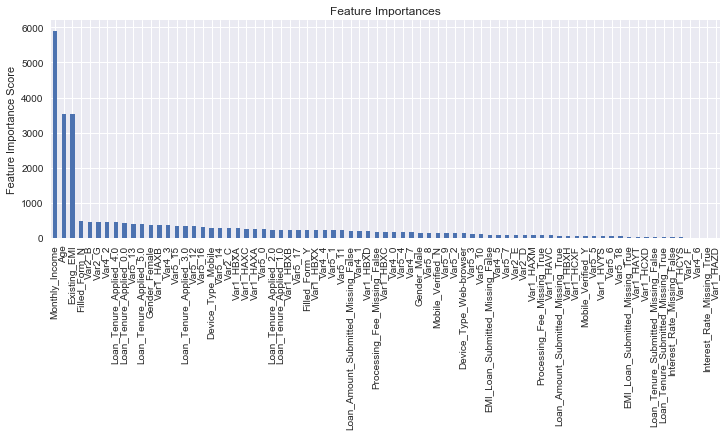

In [213]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 reg_alpha=0.001,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, ntrain, predictors)


Model Report
Accuracy : 0.9854
AUC Score (Train): 0.798385


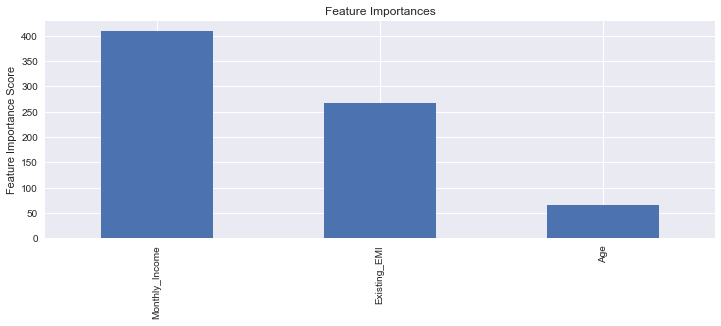

In [222]:
xgb4 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 reg_alpha=0.001,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb4, ntrain, ['Monthly_Income','Age','Existing_EMI'])